In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(".")
import plotMiFuncs as pmf
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"
from datetime import date
import numpy as np
import pandas as pd
import os

raw_data = []

###########################################################################################
###########################################################################################
# Instantiate basic stuff
fs = 14
footnote = 'Albà, ' + str(date.today())
for_report = False
pltpath = 'plots'

raw_data.append( ['tests/test_condition=pencil', '$\sigma_x$ = .1 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )
raw_data.append( ['tests/test_condition=radiation', '$\sigma_x$ = 2.5 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )

###########################################################################################
###########################################################################################

leg = []
fnames = []
for i in raw_data:
    fnames.append( i[0])
    leg.append( i[1] )

print(footnote)
# Create folder for plots if it doesn't exist
if not os.path.exists(pltpath):
    os.mkdir(pltpath)
    print("Created folder " + pltpath)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Albà, 2020-01-20


# Statistics

In [7]:
stats = []
     
for i, fname in enumerate(fnames):
    print(i)
    stats.append( pmf.importStat( fname + '/bunch-sampling/bunch.txt', show = True) )


0


FileNotFoundError: [Errno 2] File b'tests/test_condition=pencil/bunch-sampling/bunch.txt' does not exist: b'tests/test_condition=pencil/bunch-sampling/bunch.txt'

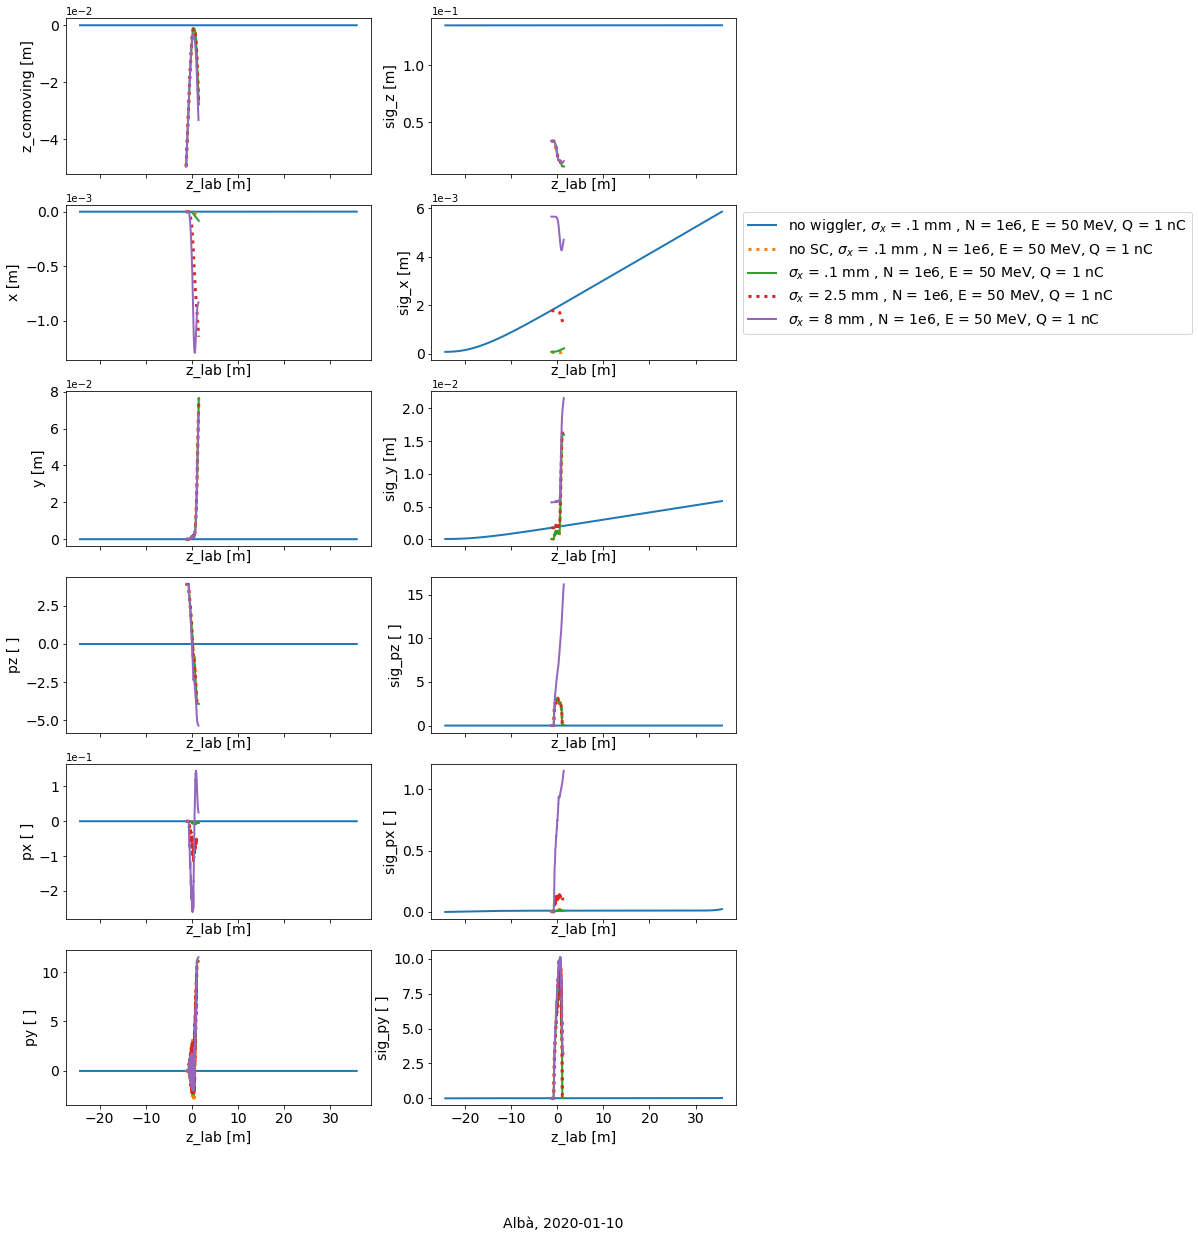

In [4]:
names = [ 'z_comoving', 'sig_z', 'x', 'sig_x', 'y', 'sig_y',
             'pz', 'sig_pz', 'px', 'sig_px', 'py', 'sig_py']

fig, axs = plt.subplots( 6,2, figsize = ( 12, 20 ), sharex = True )
dotted = [1,3,6]  # Indexes from fnames to plot with dotted lines
notPlot = []  # Indexes from fnames not to plot
legLocal = []
for i, ax in enumerate(axs.reshape(-1)):
    for j, stat in enumerate(stats):
        if j in notPlot:
            continue
        if j in dotted:
            ls = ':'
            lw = 3
        else:
            ls = '-'
            lw = 2
        pmf.plotStat(ax, stat, quants = [names[i]], factors = [1, 1], color = j%(len(stats)), lw = lw, ls = ls )
        legLocal.append(leg[j])
        # if int(i/10) == 0:
        #     ax.set_xlabel('')
axs[1,1].legend(legLocal, fontsize = fs, bbox_to_anchor = [1., 1.])
if not for_report:
    fig.text(.7, .04, footnote, fontsize = fs, ha='center')
plt.savefig((pltpath + '/avg.png'),bbox_inches='tight')
plt.show()


In [ ]:
# Get profile
fname = fnames[-1]
[data, time_stamps] = pmf.importProfile( fname + '/bunch-profile/bunch-p#-#.txt', show = True )
# Get data from slurm file
sData = ( (pmf.importSlurm( fname, show = True )).to_dict() )['var']
sData['Lu'] = sData['lu'] * sData['nP']
sData['gamma_'] = sData['gamma'] / np.sqrt( 1 + .5 * np.power(sData['K'],2.) )
print(sData)


In [ ]:
# Plot profile
ts_to_plot = [time_stamps[0], time_stamps[4] , time_stamps[-1]]
#ts_to_plot = time_stamps
print('plotting time steps ', ts_to_plot)

fig, ax = plt.subplots( len(ts_to_plot), 1, figsize = ( 10, 4*len(ts_to_plot) ), sharey = False, sharex = False )
ax = ax.reshape(-1)
for i, ti in enumerate(ts_to_plot):
    [x,y] = pmf.plotProfile( ax[i], data, ['z', 'y'], gamma_ = sData['gamma_'], frame = 'comoving',
                             show_und = True, rb = sData['rb'], dt =  sData['dt'], Lu = sData['Lu'], 
                             timeStep = ti, type = 'hist', factors = [1e3,1e3], nbins = 100, color = 1)
pmf.adjust_axes_limits( ax, 'x' )
# plt.savefig( (pltpath + '/profile_sigx_4mm_DE_100KeV.eps'), bbox_inches='tight' )    
plt.show()

In [ ]:
# Profile Lorentz transformations
# Comparison of reference frames
print(time_stamps)

fig, ax = plt.subplots( 3, 1, figsize = ( 10, 4 * 3 ), sharey = False, sharex = False )
ax = ax.reshape(-1)

for i, frame in enumerate( ['comoving', 'lab', 'labSameTime'] ):
    [x,y] = pmf.plotProfile( ax[i], data, ['z', 'y'], gamma_ = sData['gamma_'], frame = frame,
                         show_und = True, rb = sData['rb'], dt =  sData['dt'], Lu = sData['Lu'], 
                         timeStep = 7826, type = 'hist2d', factors = [1e3,1e3], nbins = 100, color = 1)
pmf.adjust_axes_limits( ax, 'x' )
plt.show()

In [5]:
# Screen data
r_data = raw_data[3]
[data, screens] = pmf.importScreen( r_data[0] + '/bunch-screen/bunch-p#-screen#.txt', show = True )

columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  16
0 tests/test_condition=radiation/bunch-screen/bunch-p#-screen0.txt


1 tests/test_condition=radiation/bunch-screen/bunch-p#-screen1.txt


Screens at  [-0.4, 0.88]


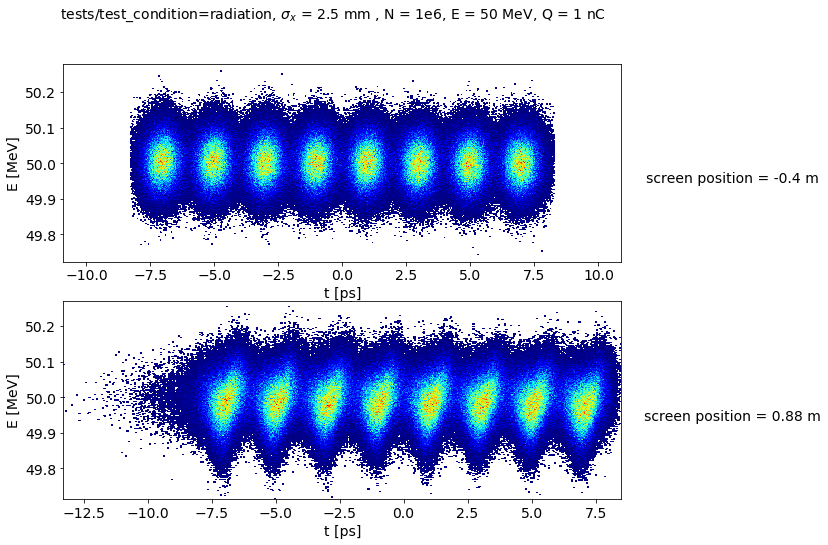

In [6]:
# Plot all screens for one folder
fig, ax = plt.subplots( len(screens), 1, figsize = ( 10, 4*len(screens) ), sharey = False, sharex = False )
ax = ax.reshape(-1)
for i in range(len(screens)):
    [x,y] = pmf.plotScreen( ax[i], data, ['t', 'E'], screenNum = i, type = 'hist2d', factors = [-1e12,1e-6], nbins = 500, color = 1)

pmf.adjust_axes_limits( ax, 'x' )
pmf.adjust_axes_limits( ax, 'y' )
fig.suptitle(r_data[0] + ', ' + r_data[1], fontsize = fs)
plt.savefig( (pltpath + '/mod_sigx_8mm.png'), bbox_inches='tight' )    
plt.show()

columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  16
1 tests/test_condition=pencil/bunch-screen/bunch-p#-screen1.txt


Screens at  [0.88]


columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  16
1 tests/test_condition=radiation/bunch-screen/bunch-p#-screen1.txt


Screens at  [0.88]


columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  16
1 tests/test_condition=pancake/bunch-screen/bunch-p#-screen1.txt


Screens at  [0.88]


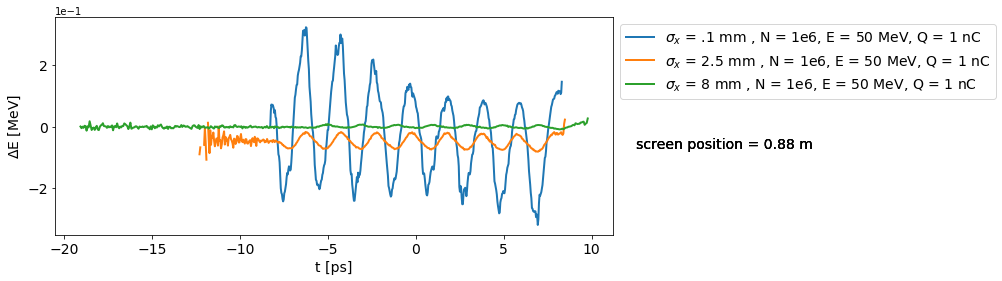

In [11]:
# Plot one screen for several examples
screen_to_plot = 1  # Index of screen to plot
examples = [2,3,4]  # Indexes if fnames to plot

#fig, ax = plt.subplots( len(examples), 1, figsize = ( 10, 4*len(examples) ))
fig, ax = plt.subplots( figsize = ( 10, 4) )
#ax = ax.reshape(-1)
for i, ex in enumerate(examples):
    [data, screens] = pmf.importScreen( raw_data[ex][0] + '/bunch-screen/bunch-p#-screen#.txt', index_screens = [screen_to_plot], show = True )
    #    [x,y] = pmf.plotScreen( ax[i], data, ['t', 'E'], screenNum = screen_to_plot, type = 'mod', factors = [-1e12,1e-6], nbins = 500, color = 1)
    [x,y] = pmf.plotScreen( ax, data, ['t', 'E'], screenNum = screen_to_plot, type = 'mod', factors = [-1e12,1e-6], nbins = 500, color = i)
#    ax[i].text( 1.3, .8, raw_data[ex][1], transform=ax[i].transAxes, fontsize = fs, ha='center' )
ax.legend( [raw_data[i][1] for i in examples], fontsize = fs, bbox_to_anchor = [1.,1.])
# pmf.adjust_axes_limits( ax, 'x' )
# pmf.adjust_axes_limits( ax, 'y' )
# fig.suptitle('screen at ' + str(screens[0]) + ' m', fontsize = fs)
plt.savefig( (pltpath + '/comp_all.png'), bbox_inches='tight' )    
plt.show()

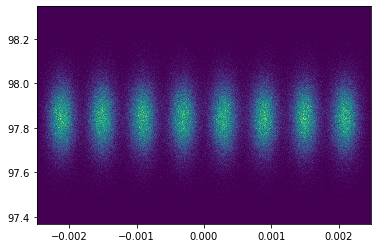

In [87]:
# plot initial input distro .csv
init = pd.read_csv('tests/test_gg_smallDeltaE_noWiggler/multiGauss.csv', sep = '\t', skiprows = 1, names = ['x', 'px', 'y', 'py', 'z', 'pz'] )
plt.hist2d(init['z'], init['pz'], bins = 500)
plt.show()